In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Import package
import seaborn as sns
import pandas as pd
import numpy as np

# Read data into DataFrame
path = "/content/drive/MyDrive/King's College London/Individual Project/Data/lisi-hri-visual-no-nan.csv"
df = pd.read_csv(path, index_col=0)
df = df.drop(columns=['data_id'])
# Remove the outlier
df.drop([442], axis=0, inplace=True)
# df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Model import
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Undersampling/Downsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
# Visualisation
import matplotlib.pyplot as plt

# Emotion

SVM(RBF) Prediction on Emotion report: 
               precision    recall  f1-score   support

           1       0.03      1.00      0.05         3
           2       0.11      0.14      0.12        29
           3       0.75      0.02      0.05       124

    accuracy                           0.06       156
   macro avg       0.30      0.39      0.07       156
weighted avg       0.62      0.06      0.06       156

SMOTETomek_svm Confusion Matrix:
 [[ 3  0  0]
 [24  4  1]
 [89 32  3]]


Text(0.5, 1.0, 'Confusion Matrix - SVM - Emotion')

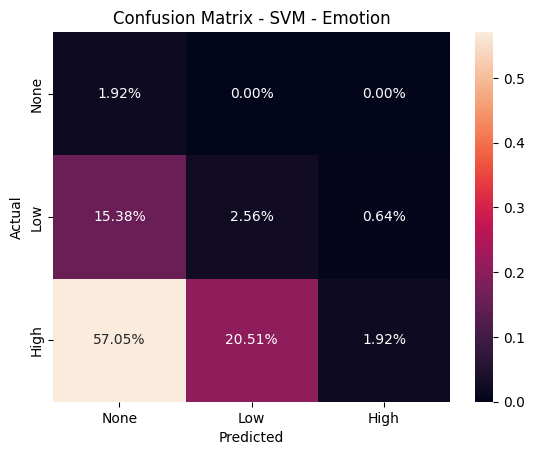

In [ ]:
X_emo = df.iloc[:, 7:14]
y_emo = df['label']
X_train_emo, X_test_emo, y_train_emo, y_test_emo = model_selection.train_test_split(X_emo, y_emo,
                                                                    train_size = 0.75,
                                                                    test_size = 0.25,
                                                                    random_state=42)
# Training model: Majority resampling strategy
SMOTETomek_emo_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='auto')),
                                    svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42))
SMOTETomek_svm_emo = SMOTETomek_emo_pipeline
SMOTETomek_svm_emo.fit(X_train_emo, y_train_emo)
y_pred_emo = SMOTETomek_svm_emo.predict(X_test_emo)

# Test report
SMOTETomek_svm_emo_report = classification_report(y_test_emo, y_pred_emo)
print('SVM(RBF) Prediction on Emotion report: \n', SMOTETomek_svm_emo_report)
# Confusion matrix
SMOTETomek_svm_emo_cm = confusion_matrix(y_test_emo, y_pred_emo)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_emo_cm)
sns.heatmap(SMOTETomek_svm_emo_cm/np.sum(SMOTETomek_svm_emo_cm), fmt='.2%',
            annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM - Emotion')

# Head Pose

SVM(RBF) Prediction on Head Pose report: 
               precision    recall  f1-score   support

           1       0.20      0.67      0.31         3
           2       0.45      0.31      0.37        29
           3       0.87      0.89      0.88       124

    accuracy                           0.78       156
   macro avg       0.51      0.62      0.52       156
weighted avg       0.78      0.78      0.77       156

SMOTETomek_svm Confusion Matrix:
 [[  2   1   0]
 [  4   9  16]
 [  4  10 110]]


Text(0.5, 1.0, 'Confusion Matrix - SVM - Head Pose')

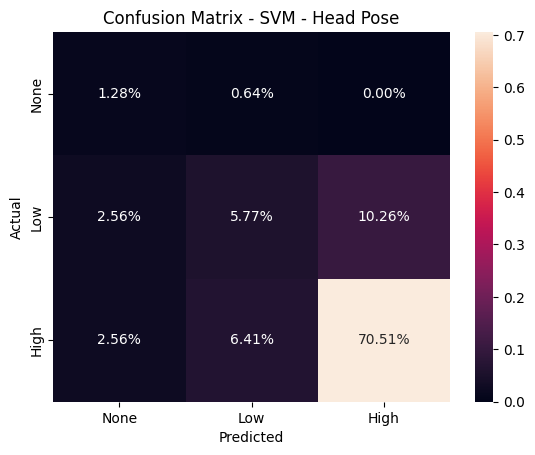

In [ ]:
X_h = df.iloc[:, 1:7]
y_h = df['label']
X_train_h, X_test_h, y_train_h, y_test_h = model_selection.train_test_split(X_h, y_h,
                                                                    train_size = 0.75,
                                                                    test_size = 0.25,
                                                                    random_state=42)
# Training model: Majority resampling strategy
SMOTETomek_h_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='auto')),
                                    svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42))
SMOTETomek_svm_h = SMOTETomek_h_pipeline
SMOTETomek_svm_h.fit(X_train_h, y_train_h)
y_pred_h = SMOTETomek_svm_h.predict(X_test_h)

# Test report
SMOTETomek_svm_h_report = classification_report(y_test_h, y_pred_h)
print('SVM(RBF) Prediction on Head Pose report: \n', SMOTETomek_svm_h_report)
# Confusion matrix
SMOTETomek_svm_h_cm = confusion_matrix(y_test_h, y_pred_h)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_h_cm)
sns.heatmap(SMOTETomek_svm_h_cm/np.sum(SMOTETomek_svm_h_cm), fmt='.2%',
            annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM - Head Pose')

# Body motion

SVM(RBF) Prediction on Head Pose report: 
               precision    recall  f1-score   support

           1       0.22      0.67      0.33         3
           2       0.78      0.24      0.37        29
           3       0.86      0.96      0.91       124

    accuracy                           0.82       156
   macro avg       0.62      0.62      0.54       156
weighted avg       0.83      0.82      0.80       156

SMOTETomek_svm Confusion Matrix:
 [[  2   0   1]
 [  4   7  18]
 [  3   2 119]]


Text(0.5, 1.0, 'Confusion Matrix - SVM - Body Motion')

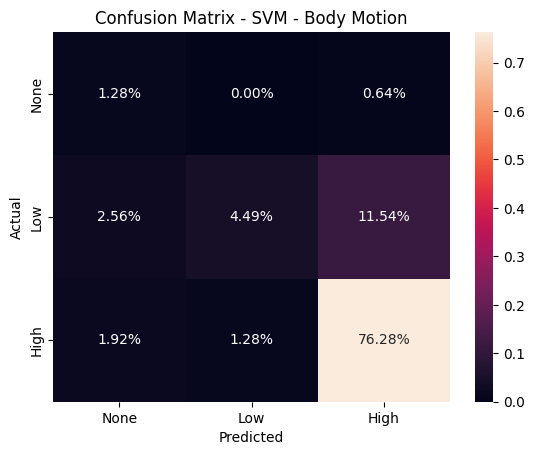

In [ ]:
X_bm = df.iloc[:, 14:]
y_bm = df['label']
X_train_bm, X_test_bm, y_train_bm, y_test_bm = model_selection.train_test_split(X_bm, y_bm,
                                                                    train_size = 0.75,
                                                                    test_size = 0.25,
                                                                    random_state=42)
# Training model: Majority resampling strategy
SMOTETomek_bm_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='auto')),
                                    svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42))
SMOTETomek_svm_bm = SMOTETomek_bm_pipeline
SMOTETomek_svm_bm.fit(X_train_bm, y_train_bm)
y_pred_bm = SMOTETomek_svm_bm.predict(X_test_bm)

# Test report
SMOTETomek_svm_bm_report = classification_report(y_test_bm, y_pred_bm)
print('SVM(RBF) Prediction on Head Pose report: \n', SMOTETomek_svm_bm_report)
# Confusion matrix
SMOTETomek_svm_bm_cm = confusion_matrix(y_test_bm, y_pred_bm)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_bm_cm)
sns.heatmap(SMOTETomek_svm_bm_cm/np.sum(SMOTETomek_svm_bm_cm), fmt='.2%',
            annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM - Body Motion')

# Feature importance

Text(0.5, 1.0, 'SVM Prediction Feature Importance')

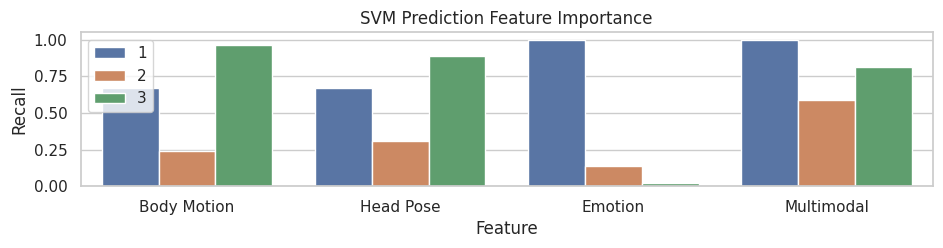

In [ ]:
# initialize data of lists.
data = {'Feature': ['Body Motion', 'Body Motion', 'Body Motion',
                    'Head Pose', 'Head Pose', 'Head Pose',
                    'Emotion', 'Emotion', 'Emotion',
                    'Multimodal', 'Multimodal', 'Multimodal'],
		    'Class': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
        'Recall': [0.67, 0.24, 0.96, 0.67, 0.31, 0.89, 1, 0.14, 0.02, 1, 0.59, 0.81]}

# Create DataFrame
featimp = pd.DataFrame(data)

# Print the output.
sns.set(rc={'figure.figsize':(11,2)})
sns.set_theme(style="whitegrid")
g = sns.barplot(data=featimp, x='Feature', y='Recall', hue='Class')
plt.legend(loc='upper left')
plt.title("SVM Prediction Feature Importance")